In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("processed_Shark_Tank_India.csv")

In [3]:
df['Total Deal Amount'].describe()

count    507.000000
mean      39.261565
std       52.888260
min        0.000000
25%        0.000000
50%       25.000000
75%       60.000000
max      500.000000
Name: Total Deal Amount, dtype: float64

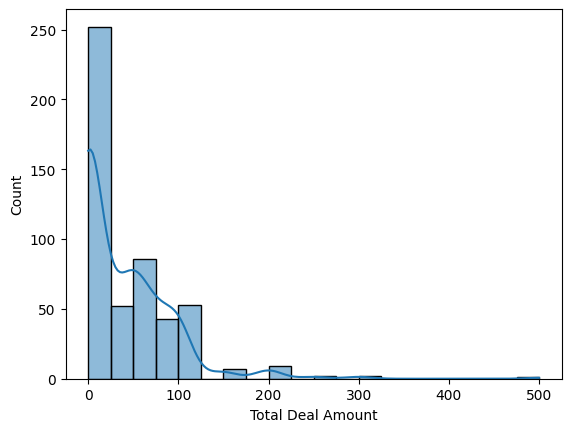

In [5]:
import seaborn as sns  
import matplotlib.pyplot as plt  

sns.histplot(df['Total Deal Amount'], bins=20, kde=True)  
plt.show()


In [6]:
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns
df_numeric.corr()['Total Deal Amount'].sort_values(ascending=False)



Total Deal Amount            1.000000
Deal Valuation               0.644890
Number of Sharks in Deal     0.622694
Peyush Investment Amount     0.553995
Aman Investment Amount       0.428256
Guest Investment Amount      0.425409
Namita Investment Amount     0.348738
Ritesh Investment Amount     0.342777
Vineeta Investment Amount    0.332048
Anupam Investment Amount     0.328052
Total Deal Equity            0.303390
Guest Investment Equity      0.200117
Peyush Investment Equity     0.193367
Season Number                0.188152
Yearly Revenue               0.186836
Amit Investment Amount       0.180713
Valuation Requested          0.174833
Advisory Shares Equity       0.142773
Aman Investment Equity       0.137363
Monthly Sales                0.128538
Pitch Number                 0.115357
Ritesh Investment Equity     0.088631
Namita Investment Equity     0.080868
Anupam Investment Equity     0.078780
Vineeta Investment Equity    0.077192
Guest Present                0.067009
EBITDA      

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
import pandas as pd

# Label Encode Industry for correlation check
df['Industry_encoded'] = LabelEncoder().fit_transform(df['Industry'])

# Compute correlation
correlation = df[['Industry_encoded', 'Total Deal Amount']].corr()
print(correlation)




                   Industry_encoded  Total Deal Amount
Industry_encoded           1.000000           0.014128
Total Deal Amount          0.014128           1.000000


In [17]:
from sklearn.model_selection import train_test_split
features = [
    'Deal Valuation', 'Number of Sharks in Deal',  
    'Total Deal Equity', 'Yearly Revenue'
]  

X = df[features]
y = df['Total Deal Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.tree import DecisionTreeRegressor

# Initialize model
dt_model = DecisionTreeRegressor(max_depth=5, min_samples_split=5,random_state=42)

# Train model
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=42)

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Compute metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Manually take square root

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


R² Score: 0.65
Mean Absolute Error: 14.52
Root Mean Squared Error: 35.67


In [18]:
from xgboost import XGBRegressor

# Initialize XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb) ** 0.5

print(f"XGBoost R² Score: {r2_xgb:.2f}")
print(f"XGBoost Mean Absolute Error: {mae_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")


XGBoost R² Score: 0.86
XGBoost Mean Absolute Error: 7.42
XGBoost RMSE: 22.92


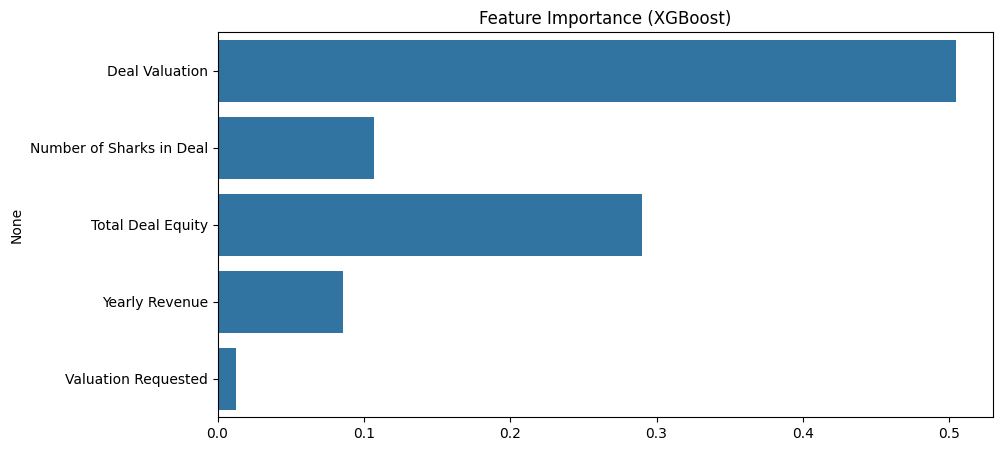

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importance = xgb_model.feature_importances_
feature_names = X_train.columns

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=importance, y=feature_names)
plt.title("Feature Importance (XGBoost)")
plt.show()


In [19]:
import joblib
joblib.dump(xgb_model, 'xgboost_total_deal_model.pkl')


['xgboost_total_deal_model.pkl']